In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HR_comma_sep.csv to HR_comma_sep.csv


In [ ]:
df = pd.read_csv(list(uploaded.keys())[0])

In [ ]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


<ipython-input-6-bfc475282b8c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='salary', y='left', data=salary_retention, order=['low', 'medium', 'high'], palette='Blues')


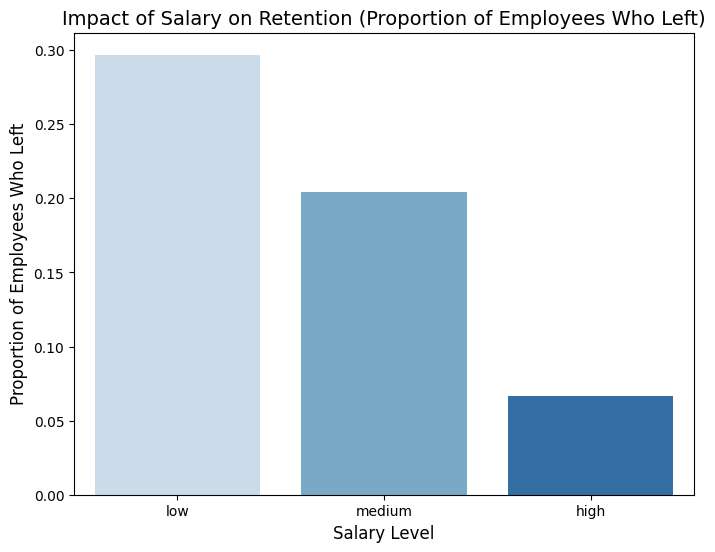

In [ ]:
plt.figure(figsize=(8, 6))
salary_retention = df.groupby('salary')['left'].mean().reset_index()
sns.barplot(x='salary', y='left', data=salary_retention, order=['low', 'medium', 'high'], palette='Blues')
plt.title('Impact of Salary on Retention (Proportion of Employees Who Left)', fontsize=14)
plt.xlabel('Salary Level', fontsize=12)
plt.ylabel('Proportion of Employees Who Left', fontsize=12)
plt.show()

<ipython-input-11-a6631c29f022>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='left', data=department_retention, palette='Greens')


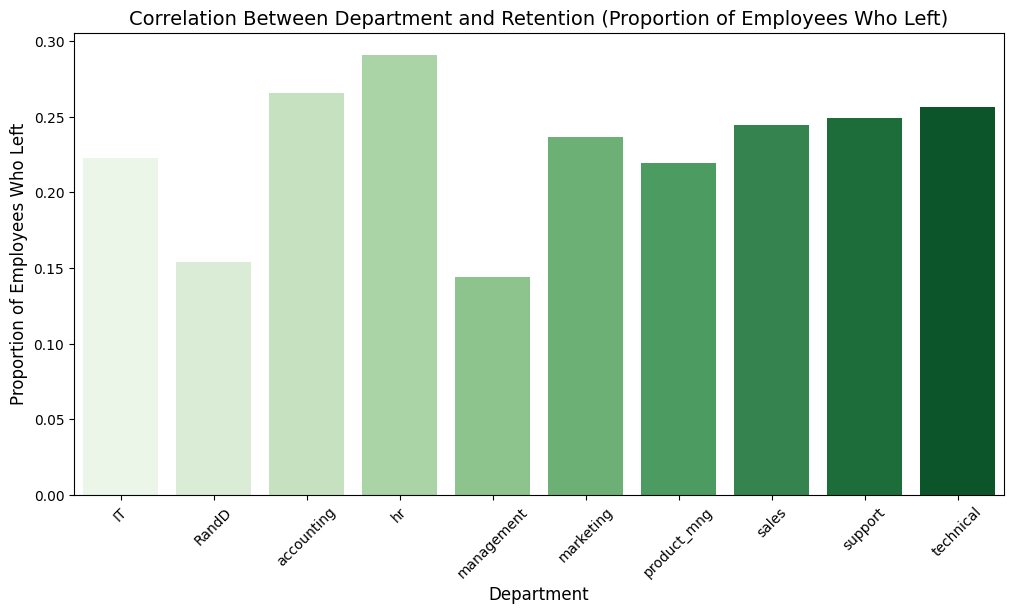

In [ ]:
plt.figure(figsize=(12, 6))
department_retention = df.groupby('Department')['left'].mean().reset_index()
sns.barplot(x='Department', y='left', data=department_retention, palette='Greens')
plt.title('Correlation Between Department and Retention (Proportion of Employees Who Left)', fontsize=14)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Proportion of Employees Who Left', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
data_model = df[['satisfaction_level', 'time_spend_company', 'salary', 'Department', 'left']]


In [ ]:
data_encoded = pd.get_dummies(data_model, columns=['salary', 'Department'], drop_first=True)


In [ ]:
X = data_encoded.drop('left', axis=1)
y = data_encoded['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred = log_reg.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy of Logistic Regression Model: {accuracy:.2f}\n")
print("Classification Report:\n")
print(classification_rep)

Accuracy of Logistic Regression Model: 0.76

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      3429
           1       0.51      0.27      0.35      1071

    accuracy                           0.76      4500
   macro avg       0.66      0.59      0.60      4500
weighted avg       0.73      0.76      0.74      4500

